<a href="https://www.kaggle.com/code/thirumani/shark-tank-brasil-data-analysis?scriptVersionId=279963210" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:lightblue;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;"> SharkTank Brazil Exploratory Data Analysis (EDA) 🦈</p>
## Dataset https://www.kaggle.com/datasets/thirumani/sharktank-brasil-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2025-Nov-19 with Python version
Python 3.11.13


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/pt/d/d8/Logotipo_Shark_Tank.jpg', width=390, height=275)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/sharktank-brasil-dataset/
shark_tank = pd.read_csv('/kaggle/input/sharktank-brasil-dataset/Shark Tank Brasil dataset.csv')

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 92
-rw-r--r-- 1 nobody nogroup 92103 Nov 19 14:20 'Shark Tank Brasil dataset.csv'

There are 519 rows and 25 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Entrepreneur Names,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names
0,1,Gourmetzinho,1,1,10-Oct-2016,26-Jan-2017,10-Oct-2016,Food and Beverage,"Healthy, frozen baby food/meals for children",NaN,NaN,500000.0,20.0,2500000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,RevoFoot,1,2,10-Oct-2016,26-Jan-2017,10-Oct-2016,Health/Wellness,"Prosthetic feet, aiming for a lighter, more du...",NaN,NaN,400000.0,20.0,2000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Velo,1,3,10-Oct-2016,26-Jan-2017,10-Oct-2016,Children/Education,"Bicycle parts, electric bikes and scooters",NaN,NaN,400000.0,20.0,2000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,BostaEmLata,1,4,10-Oct-2016,26-Jan-2017,10-Oct-2016,Business Services,"Organic fertilizer, product for urban gardeners",NaN,NaN,150000.0,30.0,500000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,M'AnaManutenção,2,5,10-Oct-2016,26-Jan-2017,17-Oct-2016,Technology/Software,platform/app for hiring female-led maintenance...,NaN,NaN,100000.0,10.0,1000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
shark_tank.tail(10).T

,509,510,511,512,513,514,515,516,517,518
Season Number,10,10,10,10,10,10,10,10,10,10
Startup Name,MeuLabirinto,VimmActivewear,LojadoAvô,Malhacão,BRASolution,Hoomy,PretaPorter,Box24x7,FreshFemme,JhowBatata
Episode Number,8,8,9,9,9,10,10,11,11,11
Pitch Number,511,512,513,514,515,516,517,518,519,520
Season Start,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025
Season End,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025
Original Air Date,16-Oct-2025,16-Oct-2025,20-Oct-2025,20-Oct-2025,20-Oct-2025,23-Oct-2025,23-Oct-2025,27-Oct-2025,27-Oct-2025,27-Oct-2025
Industry,Health/Wellness,Fitness/Sports/Outdoors,Technology/Software,Fitness/Sports/Outdoors,Business Services,Lifestyle/Home,Liquor/Alcohol,Lifestyle/Home,Health/Wellness,Food and Beverage
Business Description,"rehabilitation for labyrinthitis, tinnitus, an...",activewear/fashion sports,"online store selling classic, nostalgic toys a...",fitness equipment and accessories for home gyms,specific industrial solution or product,"Bed, Bath, and Tableware items","beer brand with a strong identity, producing a...",micro-locations focused on promoting conscious...,intimate wipes and hygiene products specifical...,potato-based product
Company Website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())

# shark_tank['Original Ask Amount'] = shark_tank['Original Ask Amount'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)

In [8]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Entrepreneur Names,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names
279,5,Empreendedor4.0,9,281,20-Nov-2020,26-Feb-2021,5-Feb-2021,Children/Education,"educational platform offering online courses, mentorship, and content for digital entrepreneurs",nan,nan,250000.000000,10.000000,2500000.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
187,4,WhoisHappy,2,188,28-Jun-2019,18-Oct-2019,5-Jul-2019,Technology/Software,SaaS platform for measuring and managing employee happiness and engagement,nan,nan,300000.000000,5.000000,6000000.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
323,6,Fertili,7,325,24-Sep-2021,17-Dec-2021,5-Nov-2021,Beauty/Fashion,natural and organic fertilizers and plant nutrition products,nan,nan,150000.000000,10.000000,1500000.000000,1.000000,150000.000000,25.000000,600000.000000,nan,nan,1.000000,150000.000000,25.000000,nan,Rodrigo Barros
112,2,MissLaura,13,113,22-Jun-2017,14-Sep-2017,14-Sep-2017,Beauty/Fashion,"premium, artisanal popsicles with sophisticated and adult-oriented flavors",nan,nan,nan,nan,nan,1.000000,150000.000000,30.000000,500000.000000,nan,nan,1.000000,150000.000000,30.000000,nan,Cristiana Arcangeli
78,2,CarneNaLata,4,79,22-Jun-2017,14-Sep-2017,13-Jul-2017,Food and Beverage,ready-to-eat cooked meat stored in cans,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
486,9,QuebradaBurger,19,488,16-Sep-2024,21-Nov-2024,18-Nov-2024,Food and Beverage,gourmet burger business aimed at redefining fast-food experiences,nan,nan,nan,nan,nan,1.000000,200000.000000,25.000000,800000.000000,nan,nan,1.000000,200000.000000,25.000000,nan,Luiza Trajano
1,1,RevoFoot,1,2,10-Oct-2016,26-Jan-2017,10-Oct-2016,Health/Wellness,"Prosthetic feet, aiming for a lighter, more durable, and accessible product using innovative materials",nan,nan,400000.000000,20.000000,2000000.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
458,9,iHUNGRY,7,460,16-Sep-2024,21-Nov-2024,7-Oct-2024,Food and Beverage,"food delivery, modernizing restaurant processes with products",nan,nan,nan,nan,nan,1.000000,300000.000000,15.000000,2000000.000000,nan,nan,1.000000,300000.000000,15.000000,nan,João Appolinário
262,5,EqualModaInclusiva,4,264,20-Nov-2020,26-Feb-2021,11-Dec-2020,Beauty/Fashion,stylish and functional clothing for people with disabilities,nan,nan,200000.000000,10.000000,2000000.000000,1.000000,200000.000000,30.000000,666667.000000,nan,nan,1.000000,200000.000000,30.000000,nan,Camila Farani
126,3,Nous,3,127,17-Aug-2018,21-Dec-2018,31-Aug-2018,Technology/Software,"smart LED lighting products for homes, controllable via an app",nan,nan,nan,nan,nan,1.000000,200000.000000,25.000000,800000.000000,nan,nan,1.000000,200000.000000,25.000000,nan,Camila Farani


In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Season Number                519 non-null    Int32  
 1   Startup Name                 519 non-null    object 
 2   Episode Number               519 non-null    Int32  
 3   Pitch Number                 519 non-null    int64  
 4   Season Start                 519 non-null    object 
 5   Season End                   519 non-null    object 
 6   Original Air Date            519 non-null    object 
 7   Industry                     516 non-null    object 
 8   Business Description         516 non-null    object 
 9   Company Website              0 non-null      float64
 10  Entrepreneur Names           3 non-null      object 
 11  Original Ask Amount          239 non-null    float64
 12  Original Offered Equity      239 non-null    float64
 13  Valuation Requested 

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

,count,mean,std,min,25%,50%,75%,max
Season Number,519.000000,5.003854,2.755827,1.000000,3.000000,5.000000,7.000000,10.000000
Episode Number,519.000000,7.789981,4.445749,1.000000,4.000000,8.000000,11.000000,20.000000
Pitch Number,519.000000,260.524085,150.399298,1.000000,130.500000,261.000000,390.500000,520.000000
Company Website,0.000000,nan,nan,nan,nan,nan,nan,nan
Original Ask Amount,239.000000,512029.309623,1775052.710396,5.000000,195000.000000,250000.000000,400000.000000,20000000.000000
Original Offered Equity,239.000000,11.332636,6.581361,4.000000,10.000000,10.000000,10.000000,50.000000
Valuation Requested,237.000000,5689378.206751,26842397.004902,17.000000,1500000.000000,2000000.000000,4000000.000000,400000000.000000
Got Deal,506.000000,0.450593,0.498045,0.000000,0.000000,0.000000,1.000000,1.000000
Total Deal Amount,228.000000,269736.842105,198631.709436,100000.000000,150000.000000,200000.000000,300000.000000,2000000.000000
Total Deal Equity,228.000000,21.494737,7.991111,1.000000,15.000000,20.000000,25.000000,60.000000


In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 10
Number of unique values in Startup Name - 518
Number of unique values in Episode Number - 20
Number of unique values in Pitch Number - 519
Number of unique values in Season Start - 10
Number of unique values in Season End - 10
Number of unique values in Original Air Date - 141
Number of unique values in Industry - 14
Number of unique values in Business Description - 516
Number of unique values in Company Website - 0
Number of unique values in Entrepreneur Names - 3
Number of unique values in Original Ask Amount - 32
Number of unique values in Original Offered Equity - 12
Number of unique values in Valuation Requested - 43
Number of unique values in Got Deal - 2
Number of unique values in Total Deal Amount - 10
Number of unique values in Total Deal Equity - 11
Number of unique values in Deal Valuation - 30
Number of unique values in Loan - 1
Number of unique values in Deal Has Conditions - 1
Number of unique values in Number of Sharks in Dea

In [12]:
# Latest/current season data
shark_tank_recent = shark_tank.loc[(shark_tank['Season Number']==10)]

In [13]:
# Data set information
print(shark_tank['Season Number'].max(), "total seasons in Brazilian SharkTank\n")

10 total seasons in Brazilian SharkTank



Season Number   1   2   3   4   5   6   7   8   9   10
Episode Number  16  13  16  17  12  13  13  10  20  11


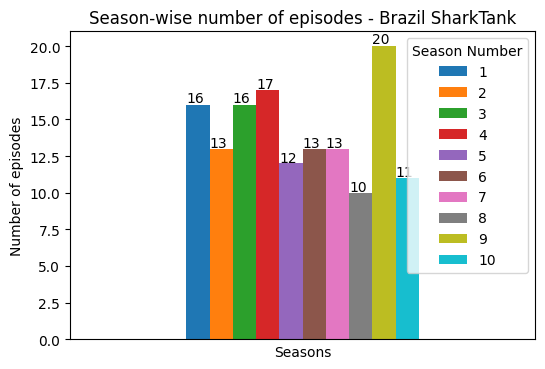

In [14]:
# Season-wise number of episodes
tmp = pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
ax = tmp.plot.bar(figsize=(6,4), title="Season-wise number of episodes - Brazil SharkTank")
plt.xlabel("Seasons")
plt.ylabel("Number of episodes")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [15]:
# Season-wise number of pitches
tmp = shark_tank['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank Brasil - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=560, height=500)
fig.update_yaxes(tickvals=list(range(11)))
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [16]:
# There were 2 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[2 3 4 5]


In [17]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Brazil Shark Tank - Industry wise startups (in all seasons)</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [18]:
# Types of industries, came for investments, in current/latest season
tmp = shark_tank_recent['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Brasil Shark Tank - Industry wise startups (in current/latest 10th season)</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [19]:
# All seasons averages
pivot = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount','Valuation Requested','Deal Valuation','Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False)
pivot.style.format('{:.0f}')

# Amount & Valuation is in BRL and equity in %

Season Number,1,2,3,4,5,6,7,8,9,10
Original Ask Amount,749924,258889,nan,272727,278571,281818,3666667,nan,7750000,nan
Total Deal Amount,219643,250000,228947,329412,438889,281818,500000,214583,269318,311538
Valuation Requested,9860797,2257780,nan,3428030,3040816,4363636,36666667,nan,nan,nan
Deal Valuation,883025,1311310,2133333,2287255,3944444,1271483,2500000,1359722,1812121,6991026
Original Offered Equity,15,19,nan,9,9,8,10,nan,35,nan
Total Deal Equity,29,22,21,18,15,26,20,19,19,15


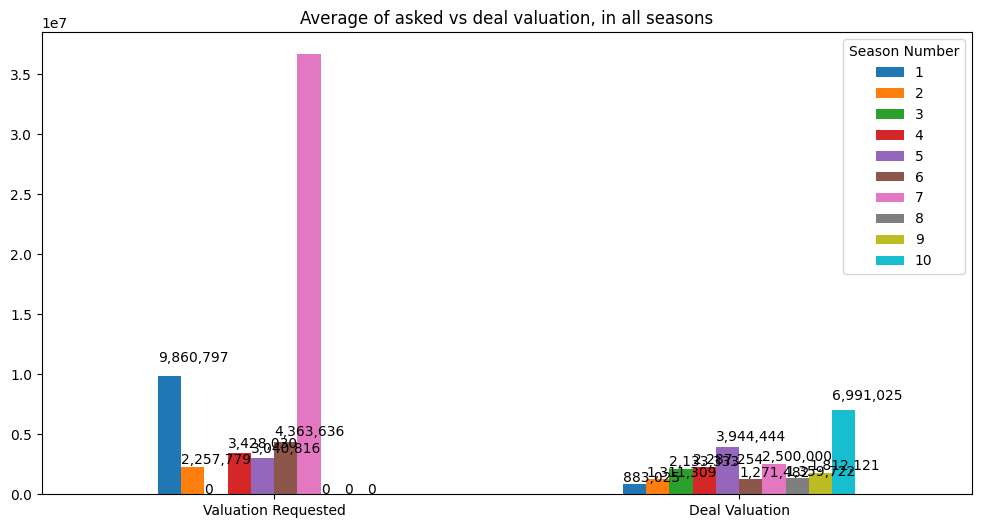

In [20]:
# All seasons average of offered/deal valuation
ax = pd.pivot_table(shark_tank, values=['Valuation Requested','Deal Valuation'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(12,6), title="Average of asked vs deal valuation, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.12))

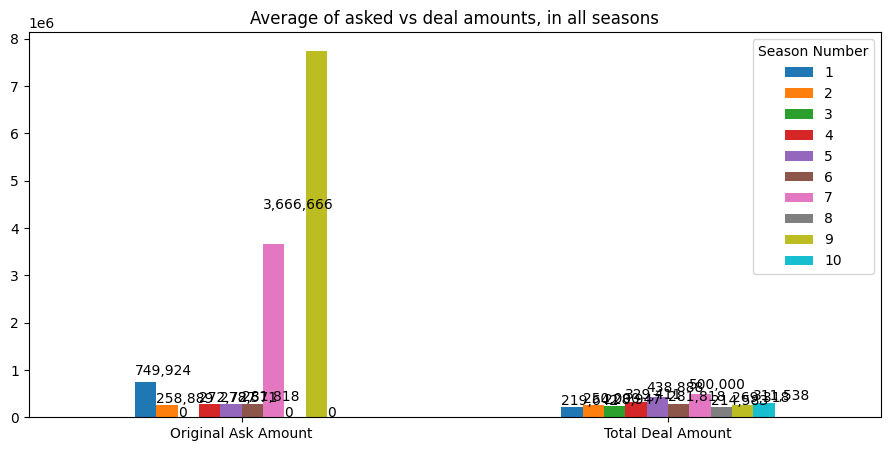

In [21]:
# All seasons average of offered/deal amounts
ax = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(11,5), title="Average of asked vs deal amounts, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.2))

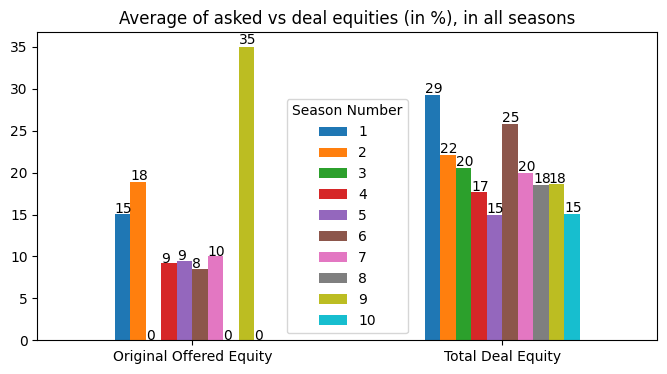

In [22]:
# All seasons average of offered/deal equities
ax = pd.pivot_table(shark_tank, values=['Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(8,4), title="Average of asked vs deal equities (in %), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

### 💹 45% companies received offers and 55% startups could not convince Sharks to invest

Got Deal
0.0    278
1.0    228
Name: count, dtype: int64 

Got Deal
0.0    55%
1.0    45%
Name: proportion, dtype: object


Text(0, 0.5, '')

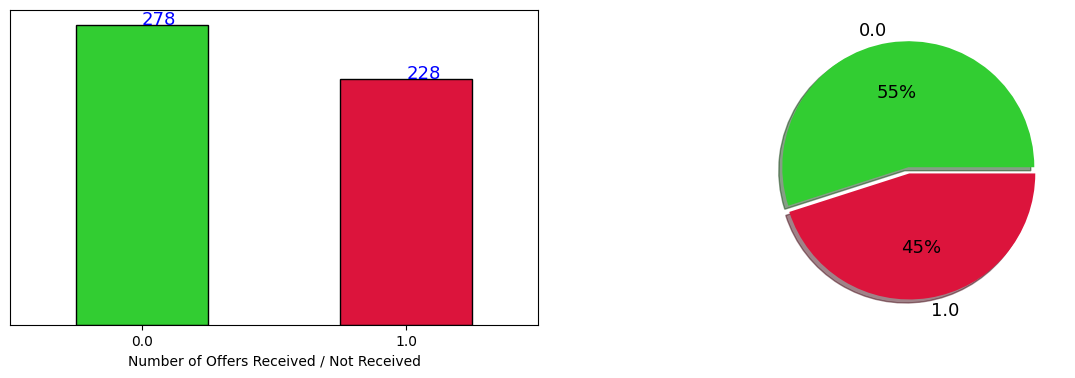

In [23]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received")
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)
plt.ylabel('')

# 228 companies Got Deals & 278 startups could not convince #Sharks to invest.

In [24]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'BRL', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - R$20,000,000


In [25]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'BRL', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - R$5


In [26]:
# Sum of investment amount asked, in Shark Tank Brasil
print("Sum of investment amount asked, by all startup companies, in Brazil Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'BRL', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Brazil Shark Tank - R$122,375,005


In [27]:
# Amount invested by all sharks, in Brazil SharkTank
print("Amount invested by all sharks, in Shark Tank Brasil -", format_currency(shark_tank['Total Deal Amount'].sum(), 'BRL', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank Brasil - R$61,500,000


In [28]:
# Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in Millions'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in Millions', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in Millions', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in Millions'].map(float).map(str))
fig.show(renderer="iframe")

#  has biggest deal in #SharkTankBrasil history

Startup Name
NetWordAgro        2000000.0
BioOnco            1500000.0
Mombak             1000000.0
PLT4Way            1000000.0
2FWIndústria        500000.0
B.Craftsman         500000.0
Bíon                500000.0
ChefBob             500000.0
CleanXSolar         500000.0
Credere             500000.0
DeixaQueEuPago      500000.0
DueLaser            500000.0
E-Senses            500000.0
Ecomilhas           500000.0
FazendaRentável     500000.0
Name: Total Deal Amount, dtype: float64


In [29]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name
PiscinApp                        60.0
BendittaPipoca                   40.0
CaldoNatural                     40.0
ChefBob                          40.0
LilyCone                         40.0
ManicuraExpress                  40.0
YouTape                          40.0
BentôKids                        35.0
Oamorésimples                    35.0
RentABag                         35.0
QGFoodTruck                      33.3
2goBag                           30.0
AqualuzCamarão                   30.0
ArmadilhaSeletivaParaTubarões    30.0
BabyConcierge                    30.0
BichodePet                       30.0
Bikecina                         30.0
Brindiamo                        30.0
CaféQuilombo                     30.0
Chameleon                        30.0
Name: Total Deal Equity, dtype: float64


In [30]:
# Startups who sold exactly 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] == 33]
# fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company")
fig.show(renderer="iframe")

Startup Name    0
dtype: int64
Empty DataFrame
Columns: [Season Number, Startup Name, Total Deal Equity]
Index: []


In [31]:
# Startups who sold more than 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ].sort_values('Total Deal Equity', ascending=False)
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold more than 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    11
dtype: int64
     Season Number     Startup Name  Total Deal Equity
13               1  ManicuraExpress               40.0
18               1         RentABag               35.0
19               1   BendittaPipoca               40.0
22               1          YouTape               40.0
23               1         LilyCone               40.0
24               1      QGFoodTruck               33.3
35               1     CaldoNatural               40.0
40               1          ChefBob               40.0
52               1    Oamorésimples               35.0
303              6        BentôKids               35.0
404              8        PiscinApp               60.0


## SharkTank America/USA statistics & data analysis https://kaggle.com/code/thirumani/shark-tank-us-data-analysis

In [32]:
# Deals with conditions
print("Number of startups who accepted conditional deals", shark_tank['Deal Has Conditions'].count(),"\n")

shark_tank.loc[shark_tank['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 1 



,Season Number,Startup Name,Total Deal Amount,Total Deal Equity
72,2,Robotron,300000.0,15.0


## 💰 Which shark invested most ?

In [33]:
# # Amount Invested by sharks, in all seasons
# Amount = [(shark_tank['Steve Investment Amount']/1000000).sum(), (shark_tank['Janine Investment Amount']/1000000).sum(), (shark_tank['Andrew Investment Amount']/1000000).sum(), (shark_tank['Naomi Investment Amount']/1000000).sum(),
#     (shark_tank['Glen Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
# name=['Steve','Janine','Andrew','Naomi','Glen','Guests']
# df = {'Name':name, 'Total Amount':Amount}
# plt.figure(figsize=(10,4))
# plt.bar(df['Name'], df['Total Amount'])
# plt.xticks(fontsize=15)
# plt.yticks([])
# for index,d in enumerate(Amount):
#     plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
# plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
# plt.show()

In [34]:
# # Equity received by sharks, in all seasons
# Equity = [shark_tank['Steve Investment Equity'].sum(), shark_tank['Janine Investment Equity'].sum(), shark_tank['Andrew Investment Equity'].sum(), shark_tank['Naomi Investment Equity'].sum(),
#     shark_tank['Glen Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
# df = {'Name':name, 'Total Equity':Equity}
# plt.figure(figsize=(10,4))
# plt.bar(df['Name'], df['Total Equity'], color='g')
# plt.xticks(fontsize=15)
# plt.yticks([])
# for index,d in enumerate(Equity):
#     plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
# plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
# plt.show()

In [35]:
# # Number of companies invested, in all seasons
# Amount = [(shark_tank['Steve Investment Amount']).count(), (shark_tank['Janine Investment Amount']).count(), (shark_tank['Andrew Investment Amount']).count(), (shark_tank['Naomi Investment Amount']).count(),
#     (shark_tank['Glen Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
# df = {'Name':name, 'Total Amount':Amount}
# plt.figure(figsize=(10,4))
# plt.bar(df['Name'], df['Total Amount'], color='pink')
# plt.xticks(fontsize=15)
# plt.yticks([])
# for index,d in enumerate(Amount):
#     plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
# plt.title("Total number of companies invested, by Sharks, in all seasons", fontsize=15)
# plt.show()

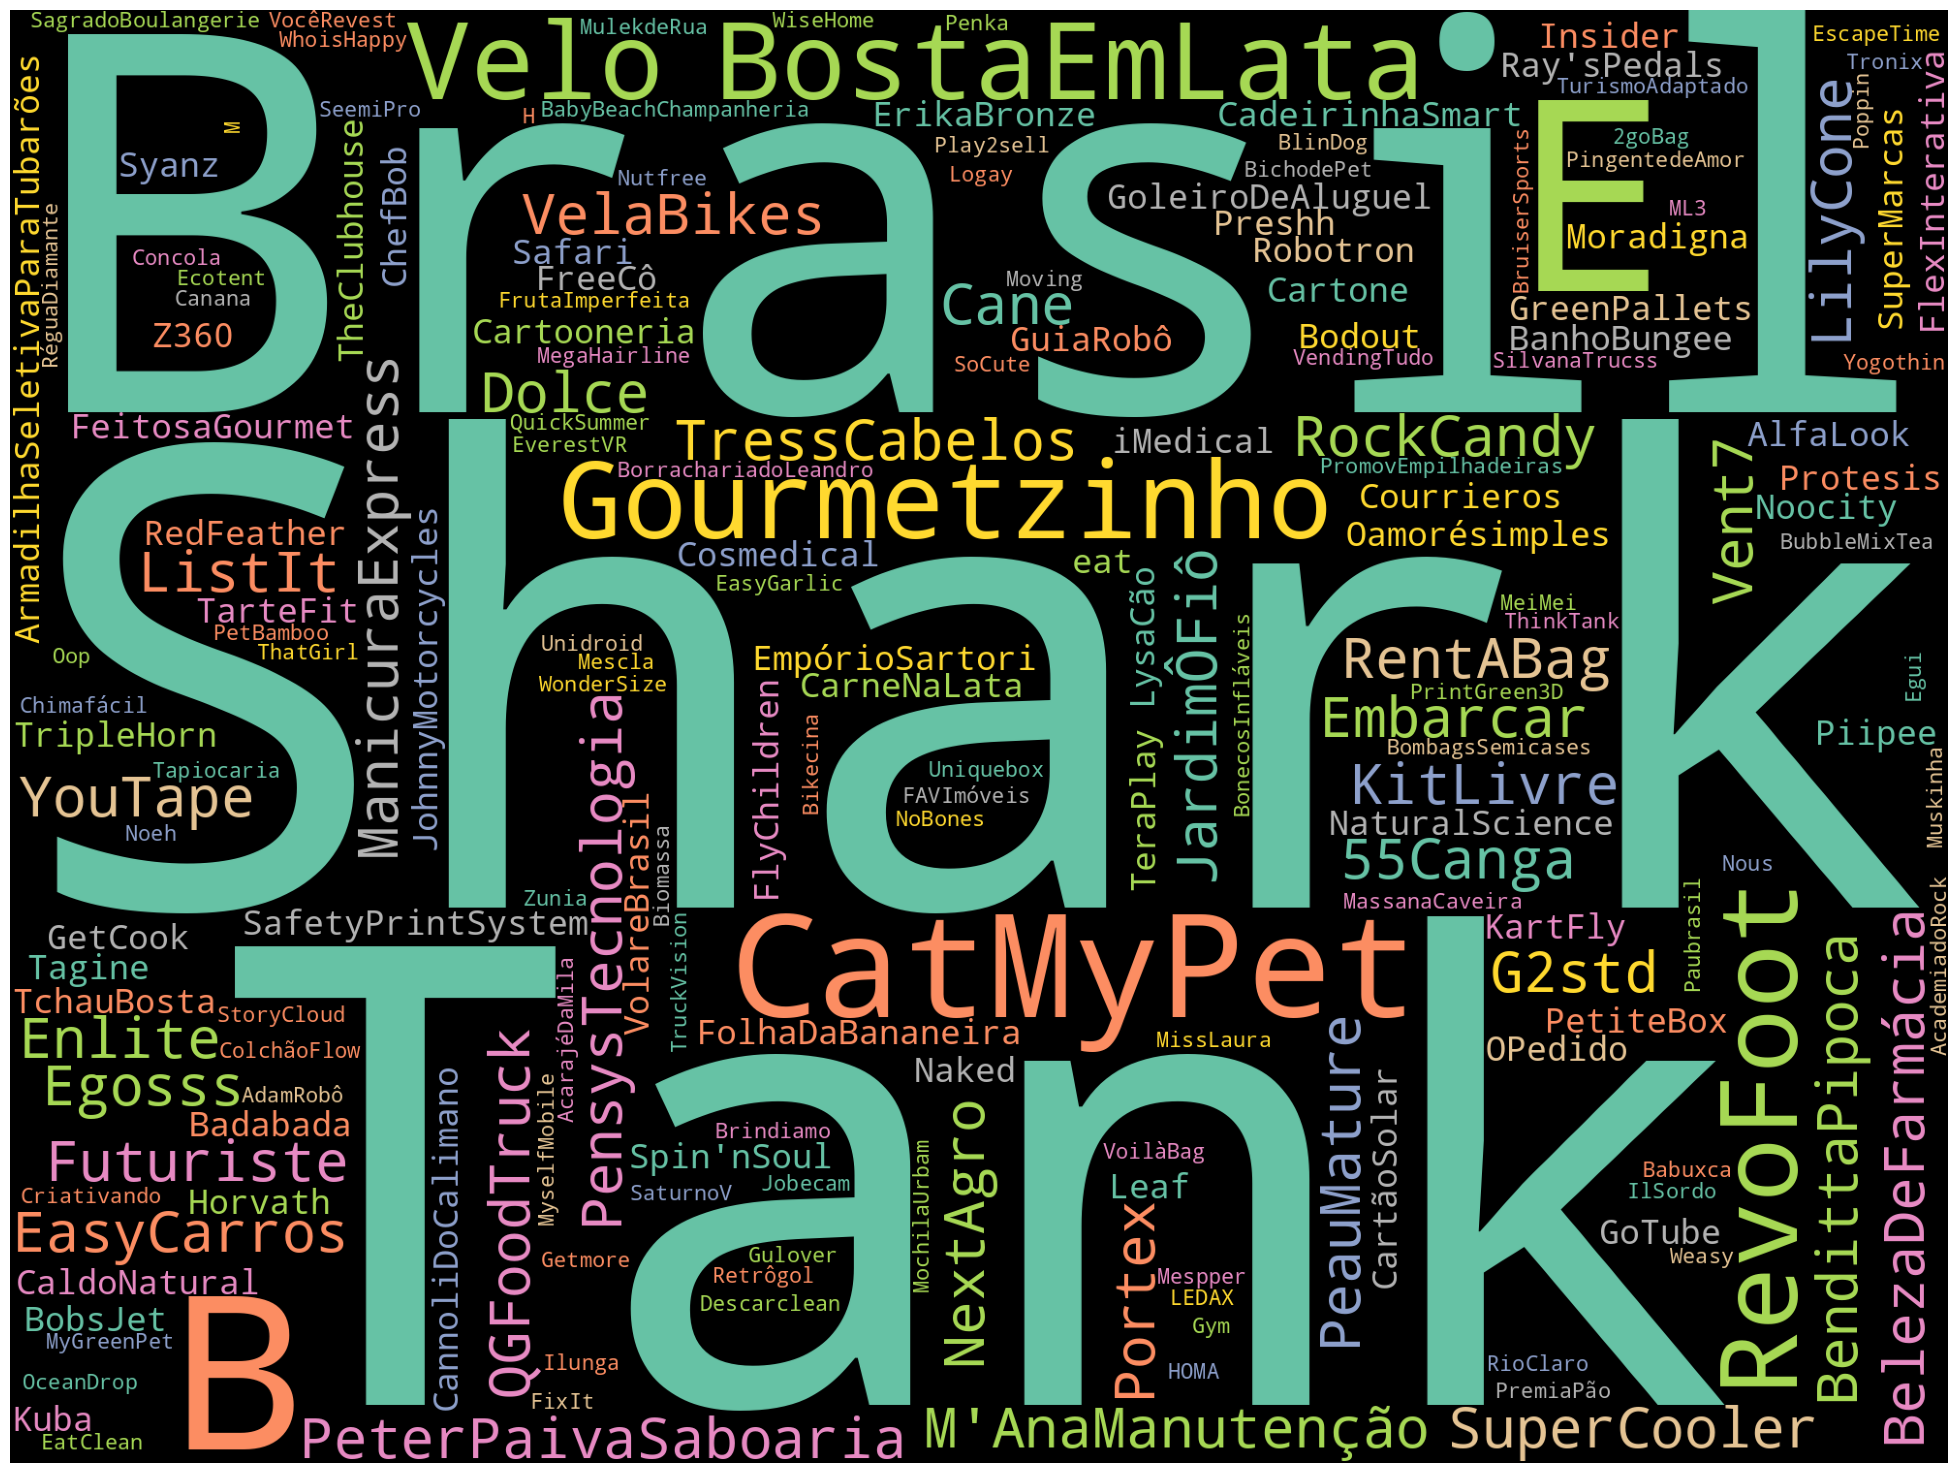

In [36]:
# Word cloud based on Startup Names, in all seasons
text = " Shark Tank Brasil ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

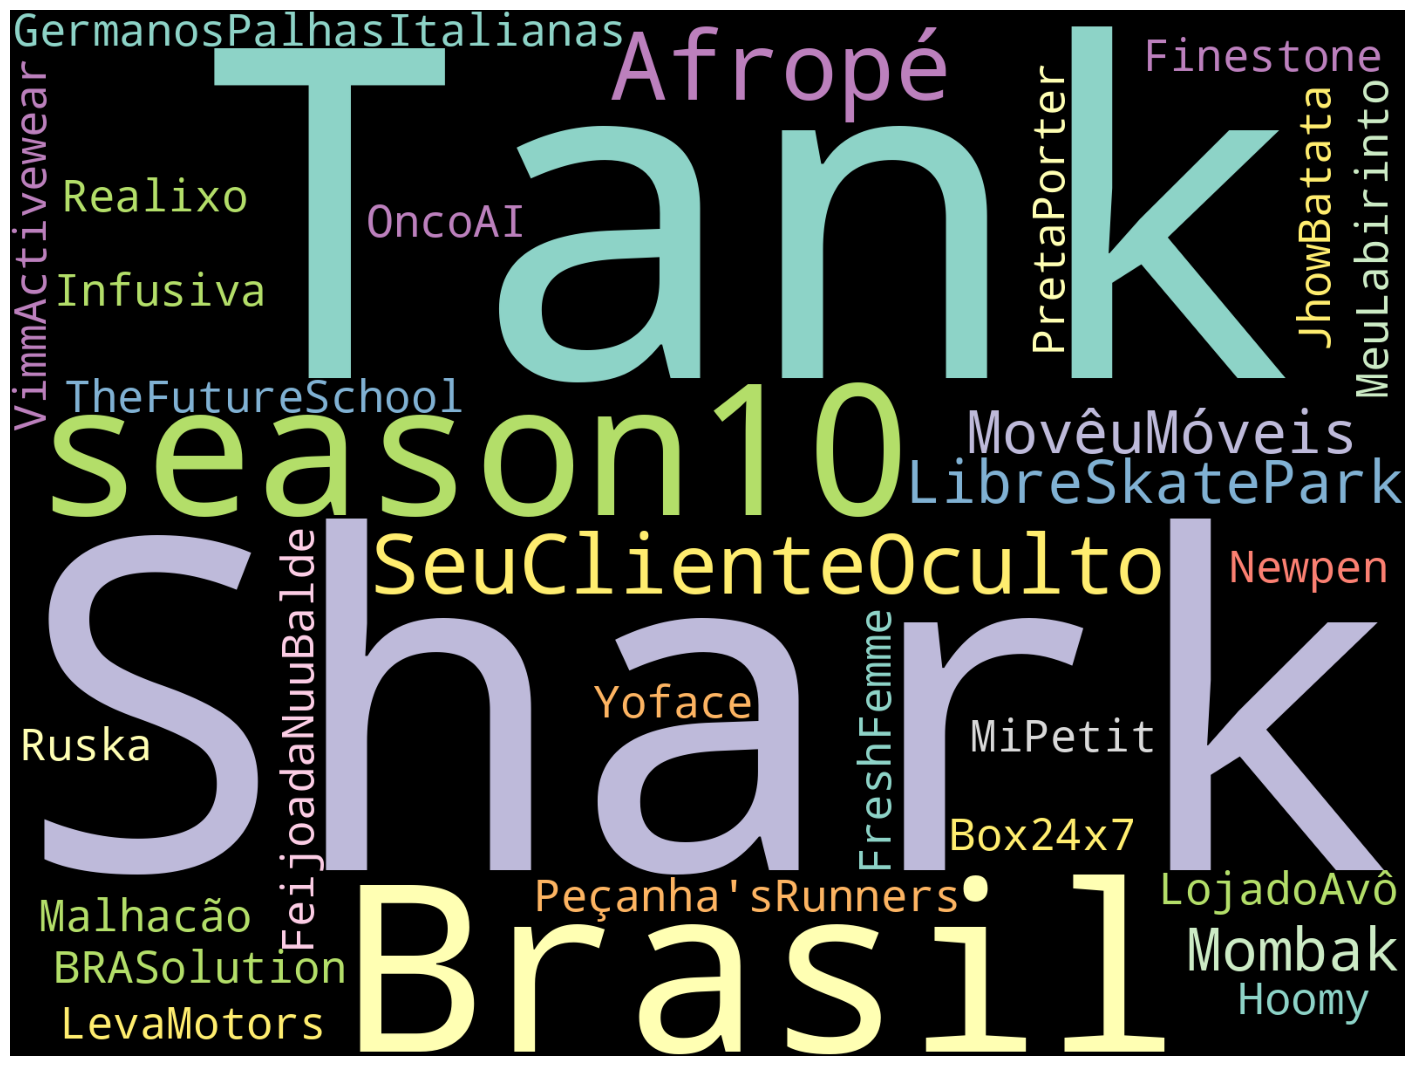

In [37]:
# Word cloud based on Startup Names, in current/latest season (10th season)
text = " Shark Tank Brasil season10 ".join(cat for cat in shark_tank_recent['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=1600, height=1200, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(18,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

Number of Sharks in Deal
1.0    199
2.0     15
5.0     10
3.0      4
Name: count, dtype: int64 

Number of Sharks in Deal
1.0    87%
2.0     7%
5.0     4%
3.0     2%
Name: proportion, dtype: object


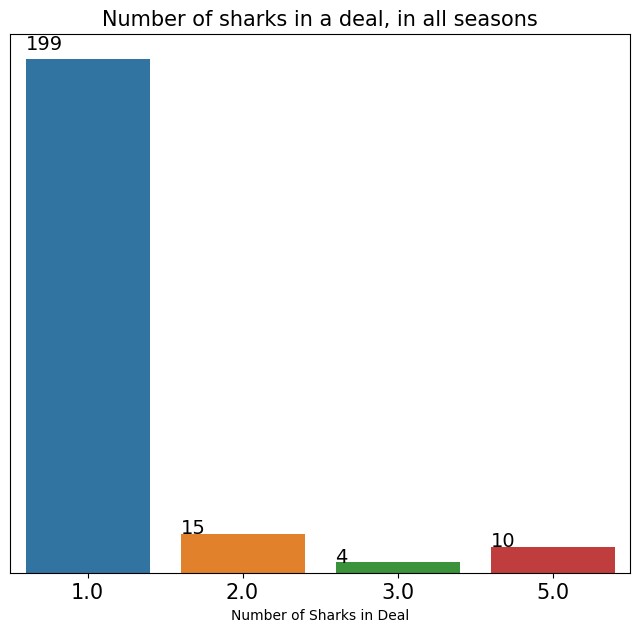

In [38]:
# Number of sharks in a deal, in all seasons
print(shark_tank['Number of Sharks in Deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(8, 7))
plt.title("Number of sharks in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of Sharks in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [39]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number      Startup Name  Total Deal Amount  Total Deal Equity
24               1       QGFoodTruck           300000.0               33.3
39               1          iMedical           500000.0               20.0
65               1         Moradigna           200000.0               15.0
75               2              Z360           500000.0               20.0
77               2  LysaCão-GuiaRobô           500000.0               30.0
93               2      TheClubhouse           500000.0               20.0
123              3        StoryCloud           500000.0               15.0
185              4         PetBamboo           200000.0               15.0
260              5      2FWIndústria           500000.0               10.0
271              5           PLT4Way          1000000.0               10.0


In [40]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (BRL) and Number of times asked

Original Ask Amount
200000.0     58
150000.0     42
300000.0     33
500000.0     32
400000.0     18
250000.0     17
100000.0      8
50000.0       3
1000000.0     3
350000.0      2
dtype: int64

In [41]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number of times offered

Original Offered Equity
10.0    151
5.0      39
20.0     15
15.0     10
30.0      9
25.0      4
8.0       3
4.0       2
7.0       2
40.0      2
dtype: int64

In [42]:
# ✅ Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Total Deal Amount (BRL) and Number of times invested

Total Deal Amount
200000.0     65
150000.0     64
300000.0     37
500000.0     33
250000.0     10
100000.0      9
400000.0      6
1000000.0     2
1500000.0     1
2000000.0     1
dtype: int64

In [43]:
# ✅ Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Total Deal Equity (in %) and Number of times invested

Total Deal Equity
25.0    51
15.0    47
20.0    47
30.0    42
10.0    28
40.0     6
35.0     3
1.0      1
1.5      1
33.3     1
dtype: int64

In [44]:
# Many (7) companies got more amount than they asked/expected
print(shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    7
dtype: int64


,Season Number,Startup Name,Original Ask Amount,Total Deal Amount
13,1,ManicuraExpress,50000.0,150000.0
15,1,Dolce&Cane,100000.0,150000.0
22,1,YouTape,50000.0,150000.0
24,1,QGFoodTruck,180000.0,300000.0
38,1,Kuba,190000.0,300000.0
39,1,iMedical,450000.0,500000.0
40,1,ChefBob,150000.0,500000.0


In [45]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

,Season Number,Startup Name,Original Offered Equity,Total Deal Equity
6,1,EasyCarros,4.0,10.0
10,1,+55Canga,10.0,25.0
11,1,SuperCooler,15.0,30.0
12,1,Egosss,15.0,25.0
13,1,ManicuraExpress,7.0,40.0
...,...,...,...,...
345,6,OkaColiving,5.0,20.0
346,6,Maré,10.0,30.0
348,6,FlowGames,10.0,25.0
391,7,B.Craftsman,10.0,20.0


In [46]:
# Below (4) companies got the same valuation they requested (with or without loan)
print(shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    4
dtype: int64


,Season Number,Startup Name,Valuation Requested,Deal Valuation
260,5,2FWIndústria,5000000.0,5000000.0
271,5,PLT4Way,10000000.0,10000000.0
292,5,Egalitê,4000000.0,4000000.0
294,5,Nanoprice,5000000.0,5000000.0


In [47]:
# There are 7 companies which got more valuation than they pitched
print(shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    7
dtype: int64


,Season Number,Startup Name,Valuation Requested,Deal Valuation
15,1,Dolce&Cane,333333.0,500000.0
22,1,YouTape,250000.0,375000.0
24,1,QGFoodTruck,450000.0,900901.0
39,1,iMedical,1500000.0,2500000.0
40,1,ChefBob,750000.0,1250000.0
66,2,OPedido,1500000.0,2000000.0
72,2,Robotron,1320000.0,2000000.0


In [48]:
# Correlation matrix
shark_tank.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

,Season Number,Episode Number,Pitch Number,Company Website,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Total Deal Amount in Millions
Season Number,1.000000,-0.063592,0.992139,nan,0.031990,-0.322180,-0.060471,0.173276,0.058704,-0.325206,0.122992,-0.200785,0.159639,-0.209646,0.058704
Episode Number,-0.063592,1.000000,0.032531,nan,-0.061963,0.044541,-0.056818,-0.062546,-0.037673,0.020077,-0.077532,-0.092793,0.057236,0.086552,-0.037673
Pitch Number,0.992139,0.032531,1.000000,nan,0.007523,-0.328870,-0.073023,0.151787,0.061440,-0.319120,0.111884,-0.204159,0.164814,-0.201317,0.061440
Company Website,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Original Ask Amount,0.031990,-0.061963,0.007523,nan,1.000000,0.188513,0.940169,0.066452,0.054804,-0.024516,0.034814,0.052525,-0.030617,-0.096471,0.054804
Original Offered Equity,-0.322180,0.044541,-0.328870,nan,0.188513,1.000000,-0.112232,-0.069670,-0.172248,0.307104,-0.219874,0.167355,-0.268651,0.140437,-0.172248
Valuation Requested,-0.060471,-0.056818,-0.073023,nan,0.940169,-0.112232,1.000000,0.079804,0.123629,-0.048625,0.091840,0.082305,0.016450,-0.147776,0.123629
Got Deal,0.173276,-0.062546,0.151787,nan,0.066452,-0.069670,0.079804,1.000000,nan,nan,nan,nan,nan,nan,nan
Total Deal Amount,0.058704,-0.037673,0.061440,nan,0.054804,-0.172248,0.123629,nan,1.000000,-0.363672,0.542768,0.319721,0.758058,-0.481788,1.000000
Total Deal Equity,-0.325206,0.020077,-0.319120,nan,-0.024516,0.307104,-0.048625,nan,-0.363672,1.000000,-0.386829,-0.022674,-0.423346,0.809330,-0.363672


In [49]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.3
# matplotlib version: 3.7.2
# seaborn version: 0.12.2
# plotly version: 5.24.1

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.7.2
seaborn version: 0.12.2
plotly version: 5.24.1


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [50]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Entrepreneur Names,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions


In [51]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Entrepreneur Names,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions


In [52]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Entrepreneur Names,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions


In [53]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of Sharks in Deal'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Entrepreneur Names,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions


In [54]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Entrepreneur Names,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions


In [55]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Entrepreneur Names,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions


In [56]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Invested Shark Names'].notnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Entrepreneur Names,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions
